# Hive Metrics

In [47]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd
import seaborn as sns
from io import StringIO
import requests
import json
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture
%matplotlib inline

Getting Poughkeepsie, NY local hive metrics from 
https://map.beecounted.org/citizen_science/embedded_map
using curl for each hive

In [128]:
!mkdir -p data

In [ ]:
# Get weight data
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/p2qf/1304612040/1620231240/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/p2qf/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-p2qf.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/OAco/1304619496/1620238696/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/OAco/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-OAco.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/58ho/1304619714/1620238914/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/58ho/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-58ho.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/zvaP/1304619917/1620239117/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/zvaP/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-zvaP.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/1cdn/1304619909/1620239109/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/1cdn/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-1cdn.html

In [130]:
# Get temp data
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/p2qf/1304612040/1620231240/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/p2qf/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-p2qf.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/sPxZ/1304619093/1620238293/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/sPxZ/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-sPxZ.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/oJfp/1304619285/1620238485/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/oJfp/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-oJfp.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/OAco/1304619496/1620238696/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/OAco/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-OAco.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/FoYq/1304619591/1620238791/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/FoYq/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-FoYq.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/58ho/1304619714/1620238914/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/58ho/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-58ho.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/zvaP/1304619917/1620239117/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/zvaP/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-zvaP.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/1cdn/1304619909/1620239109/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/1cdn/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-1cdn.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  352k    0  352k    0     0  17088      0 --:--:--  0:00:21 --:--:--     0--:--     0:-- 73998
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  367k    0  367k    0     0  24871      0 --:--:--  0:00:15 --:--:-- 96430
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  279k    0  279k    0     0  30209      0 --:--:--  0:00:09 --:--:-- 67259
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  322k    0  322k    0     0  21422      0 --:--:--  0:00:15 --:--:-- 78860 0      0      0 --:--:--  0:00:0

In [131]:
# Get humidity data
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/p2qf/1304612040/1620231240/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/p2qf/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-p2qf.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/sPxZ/1304619093/1620238293/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/sPxZ/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-sPxZ.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/oJfp/1304619285/1620238485/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/oJfp/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-oJfp.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/FoYq/1304619591/1620238791/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/FoYq/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-FoYq.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/58ho/1304619714/1620238914/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/58ho/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-58ho.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/zvaP/1304619917/1620239117/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/zvaP/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-zvaP.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/1cdn/1304619909/1620239109/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/1cdn/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-1cdn.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  313k    0  313k    0     0  18311      0 --:--:--  0:00:17 --:--:-- 75290
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  240k    0  240k    0     0  18071      0 --:--:--  0:00:13 --:--:-- 72887
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  261k    0  261k    0     0  38465      0 --:--:--  0:00:06 --:--:--   497      0 --:--:--  0:00:01 --:--:--     09      0 --:--:--  0:00:06 --:--:-- 71563
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  326k    0  326k    0     0  22670      0 --:-

In [14]:
import sys
#!{sys.executable} -m pip install ?

In [15]:
# Imports all the stuffs
import datetime
import json
import matplotlib as plt
import os
import pandas as pd
from pprint import pprint
import re

In [16]:
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +datetime.timedelta(hours=t.minute//30))

In [17]:
directory = r'data'
hive_dfs = {}

for filename in os.listdir(directory):
    if filename[:4] == "hive":
        fullname = os.path.join(directory, filename)
        hive_id = filename.split("-")[1].replace(".html","")
        metric = filename.replace("hive_summary_","").replace(f"_graph-{hive_id}.html","")
        print(fullname,hive_id, metric)
        if hive_id not in hive_dfs:
            hive_dfs[hive_id] = {}
        with open(fullname, "r") as f:
            content = f.read()
        m = re.search(r"\s*data: (\[.*?,\]),", content)
        if m is not None:
            result = json.loads(m.group(1).replace("],]","]]"))
            result = [[hour_rounder(datetime.datetime.utcfromtimestamp(float(r[0])/1000.)), r[1]]for r in result]
            df = pd.DataFrame(result, columns=['dt',metric])
            df = df.set_index('dt')
            hive_dfs[hive_id][metric] = df

data\hive_summary_humidity_graph-1cdn.html 1cdn humidity
data\hive_summary_humidity_graph-58ho.html 58ho humidity
data\hive_summary_humidity_graph-FoYq.html FoYq humidity
data\hive_summary_humidity_graph-oJfp.html oJfp humidity
data\hive_summary_humidity_graph-p2qf.html p2qf humidity
data\hive_summary_humidity_graph-sPxZ.html sPxZ humidity
data\hive_summary_humidity_graph-zvaP.html zvaP humidity
data\hive_summary_temperature_graph-1cdn.html 1cdn temperature
data\hive_summary_temperature_graph-58ho.html 58ho temperature
data\hive_summary_temperature_graph-FoYq.html FoYq temperature
data\hive_summary_temperature_graph-OAco.html OAco temperature
data\hive_summary_temperature_graph-oJfp.html oJfp temperature
data\hive_summary_temperature_graph-p2qf.html p2qf temperature
data\hive_summary_temperature_graph-sPxZ.html sPxZ temperature
data\hive_summary_temperature_graph-zvaP.html zvaP temperature
data\hive_summary_weight_graph-58ho.html 58ho weight
data\hive_summary_weight_graph-OAco.html OAc

In [18]:
for hive in hive_dfs:
    for k in hive_dfs[hive].keys():
        pprint(hive_dfs[hive][k])
        #merge dfs for each hive here

                     humidity
dt                           
2016-07-30 18:00:00      93.5
2016-07-30 19:00:00      93.3
2016-07-30 20:00:00      95.1
2016-07-30 21:00:00      96.1
2016-07-30 22:00:00      96.8
...                       ...
2021-05-03 06:00:00      91.1
2021-05-03 07:00:00      86.1
2021-05-03 08:00:00      78.0
2021-05-03 09:00:00      69.1
2021-05-03 10:00:00      68.0

[41705 rows x 1 columns]
                     temperature
dt                              
2016-07-30 18:00:00         72.0
2016-07-30 19:00:00         70.7
2016-07-30 20:00:00         69.8
2016-07-30 21:00:00         70.1
2016-07-30 22:00:00         69.3
...                          ...
2021-05-03 06:00:00         51.9
2021-05-03 07:00:00         54.4
2021-05-03 08:00:00         57.6
2021-05-03 09:00:00         60.5
2021-05-03 10:00:00         61.5

[41705 rows x 1 columns]
                     humidity
dt                           
2016-07-30 18:00:00      93.5
2016-07-30 19:00:00      93.3
2016-07-3

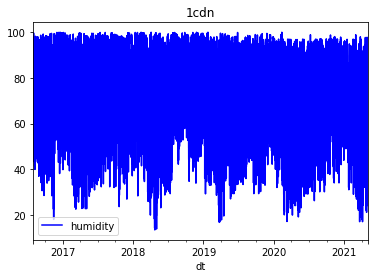

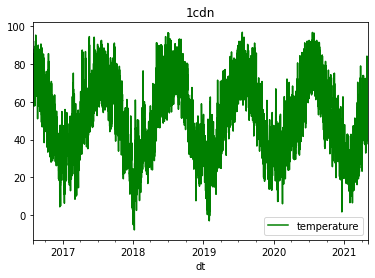

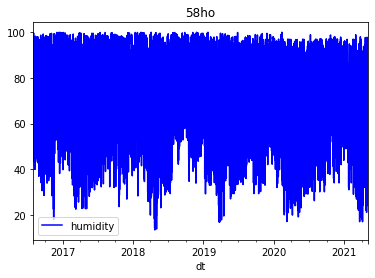

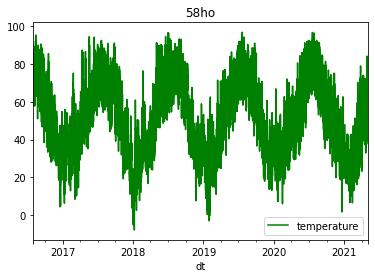

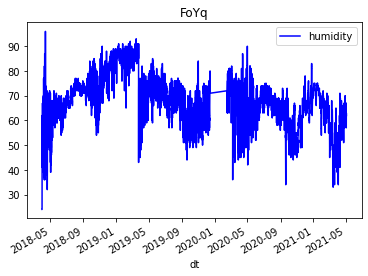

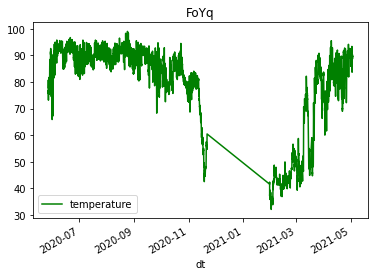

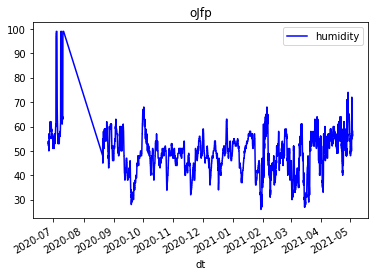

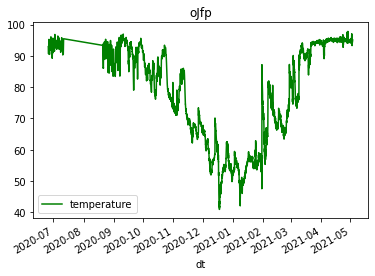

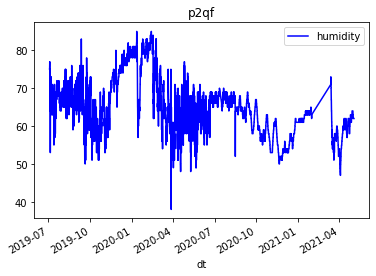

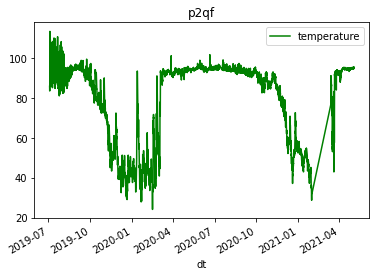

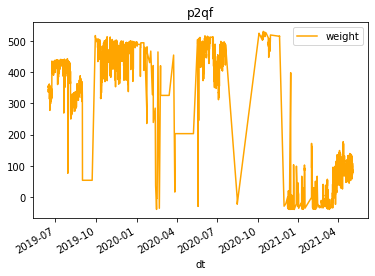

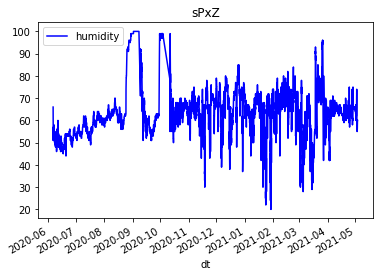

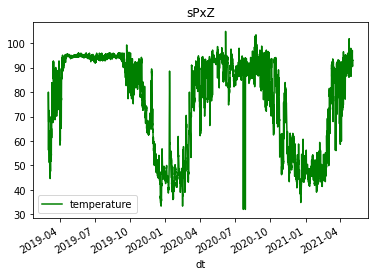

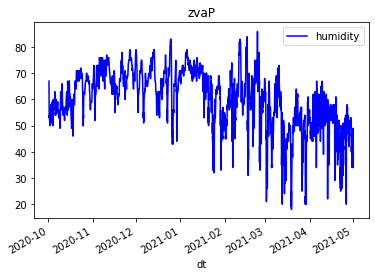

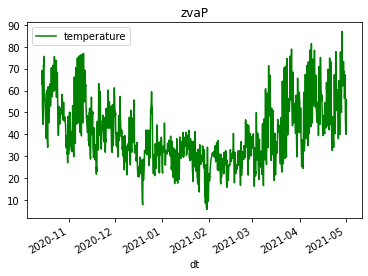

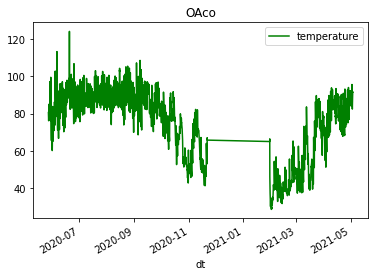

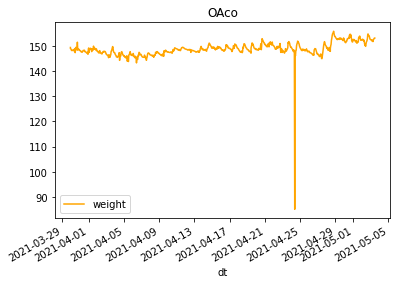

In [19]:
for hive in hive_dfs:
    for k in hive_dfs[hive].keys():
        if k == "temperature":
            color = "green"
        elif k == "humidity":
            color = "blue"
        elif k == "weight":
            color = "orange"
        hive_dfs[hive][k].plot(title=hive, color=color);

In [30]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [77]:
#tmpdf = hive_dfs["1cdn"]["humidity", "temperature"]
#hive_dfs["1cdn"].keys()

dict_keys(['humidity', 'temperature'])

In [78]:
for hive in ["1cdn"]:
    tmpdf = hive_dfs[hive][['humidity', 'temperature']]
    ss = StandardScaler()
    ss.fit_transform(tmpdf)
    for col in tmpdf:
        for col2 in tmpdf:
            clust_labels, cent = doKmeans(tmpdf, 4)
            kmeans = pd.DataFrame(clust_labels)
            #Plot the clusters obtained using k means
            fig = plt.figure()
            ax = fig.add_subplot(111)
            scatter = ax.scatter(tmpdf[col],tmpdf[col2],
                                 c=kmeans[0],s=50)
            ax.set_title(hive + ' K-Means Clustering: ' + col + " vs. " + col2)
            ax.set_xlabel(col)
            ax.set_ylabel(col2)
            plt.colorbar(scatter)

TypeError: unhashable type: 'list'